# Iris Dataset: An In-Depth Exploratory Data Analysis

## Introduction
The **Iris** is a diverse group of flowering plants known for its striking, colorful blossoms. With around **260 to 300 species**, this genus is named after the **Greek goddess of the rainbow, Iris**, reflecting the wide range of hues found in its flowers. While primarily referring to plants within its own genus, the name is sometimes applied to related species as well. Highly valued for their beauty, Irises are commonly cultivated in **gardens and botanical collections**. Their petals come in a variety of shades, including **purple, lavender, orange, pink, and white**.

The Iris dataset is a classic dataset in the data science world. It contains measurements for 150 iris flowers from three different species: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*. 

![title](img/Iris_species.png)

The measurements are separated in the length and width of the petal and sepal.

![title](img/Width_and_length.png)

**Objectives:**
- Explore the dataset through statistical summaries and visualizations.
- Test some hypotheses about the separability of species using different features.
- Build a simple classification model to predict iris species.
- Showcase my ability to apply data analysis and machine learning techniques in Python.

---

## Table of Contents
- [Data Loading and Cleaning](##data-loading-and-cleaning)
- [Exploratory Data Analysis (EDA)](##exploratory-data-analysis-eda)
- [Statistical Analysis](##statistical-analysis)
- [Modeling: Classification](##modeling-classification)
- [Conclusions and Future Work](##conclusions-and-future-work)

---


## Data Loading and Cleaning

### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset directly from seaborn's built-in dataset

In [6]:
iris = sns.load_dataset('iris')

### Displaying first few rows

In [8]:
print("\nFirst 5 rows of the dataset:")
print(iris.head())


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Displaying dataset information

In [10]:
print("\nDataset Information:")
print(iris.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


There are 150 rows and 5 columns

### Checking the count for each species

In [13]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Each species have 50 instances, which makes the dataset equally balanced

### Checking for missing values

In [16]:
print("\nMissing Values:")
print(iris.isnull().sum())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


There are no null values, we can go straight into the EDA

## Exploratory Data Analysis (EDA)

In this section, we'll explore the dataset through:
- **Descriptive Statistics**: Getting an overview of the data.
- **Distribution Plots**: Visualizing feature distributions by species.
- **Scatter Plots and Pair Plots**: Understanding the relationships between features.


### Descriptive statistics

In [20]:
print("Descriptive Statistics:")
print(iris.describe())

Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


- The **mean** values suggest that, on average, **petal length (3.76 cm) and petal width (1.20 cm)** are smaller than **sepal length (5.84 cm) and sepal width (3.06 cm)**.
- The **standard deviations (std)** indicate that **petal length and width have higher variability** compared to sepals. This suggests petal measurements are more spread out across the dataset.
- Analyzing the **min and max values** we can gather that:
  - **Sepal length** varies from **4.3 cm to 7.9 cm**.
  - **Sepal width** ranges between **2.0 cm and 4.4 cm**, meaning some flowers have very narrow or broad sepals.
  - **Petal length and width** have the **widest range**, especially **petal length (1.0 cm to 6.9 cm)**, indicating significant variation in petal size.
- Analyzing the **Interquartile Range (IQR)** we can gather that:
  - The **IQR for petal length is large (1.6 cm to 5.1 cm)**, reinforcing that petal sizes differ significantly.
  - **Sepal width (IQR: 2.8 cm to 3.3 cm)** is the most **consistent** feature, meaning most flowers have similar sepal widths.

### Distribution plots for each feature by species

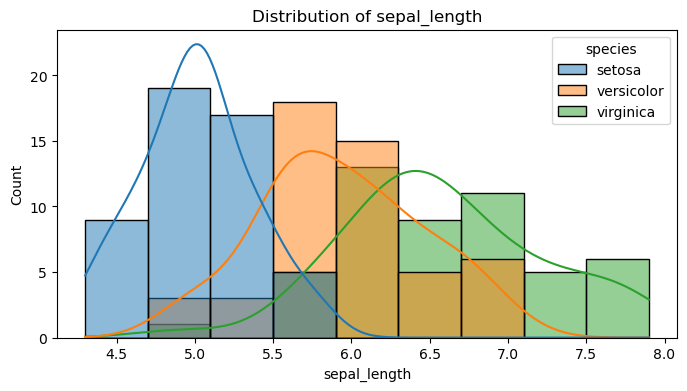

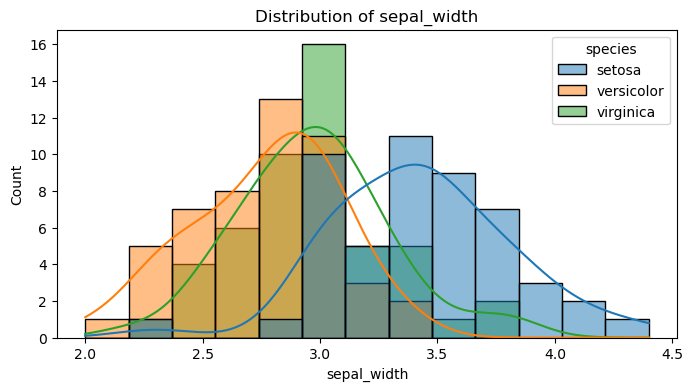

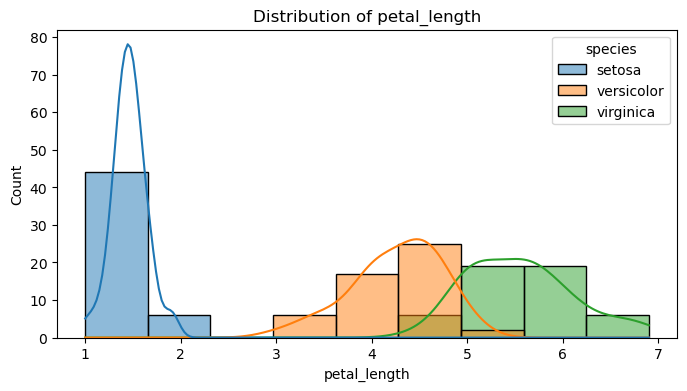

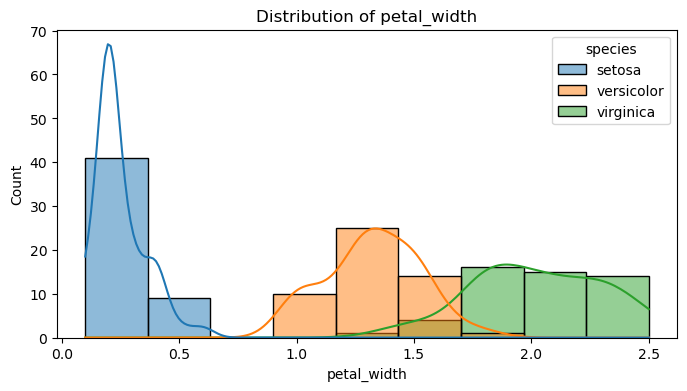

In [23]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=iris, x=feature, hue='species', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

From the above histograms we can see that:
- On the basis of **sepal length and width**, **all species** are **overlapping**, especially on sepal width with a tight overlap.
  - If a feature doesn’t show clear separation between species, it may not contribute much to classification.
  - **Setosa, Versicolor, and Virginica share similar sepal dimensions**, making it harder to use these alone for species identification.
- Meanwhile, on the basis of **petal length and width**, the **setosa is separable** while the other two are overlapping.
  - This suggests **petal measurements are more informative** for classification than sepal measurements.
  - **Setosa is the easiest to classify**, while Versicolor and Virginica require more advanced techniques.

### Pair plot to show relationships

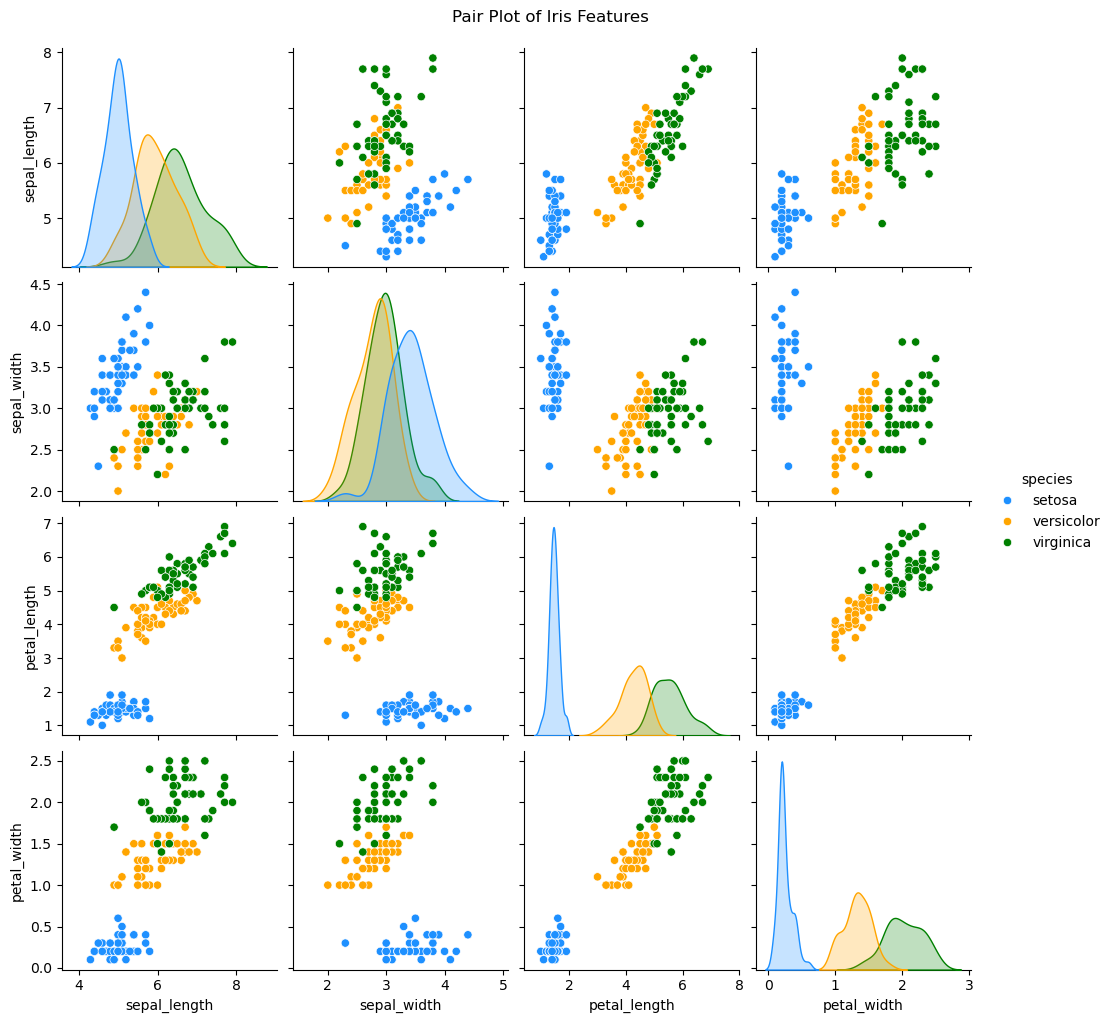

In [26]:
sns.pairplot(iris, hue='species', palette=['dodgerblue', 'orange', 'green'])
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()


- Analyzing **sepal length and width**, we see that **setosa is easily separable** but versicolor & virginica still have some overlap.
  - Previous histogram analysis suggested that sepal length and width alone were not very useful due to overlap.
  - However, the pair plot confirms that **Setosa is distinctly separate from the other two species** when looking at both sepal features together.
  - Versicolor and Virginica still overlap significantly, meaning they cannot be reliably separated based on sepal measurements alone.
- In the case of **petal length and width**, however, **all the species are quite separable**.
  - Unlike sepals, **petal length and width now show clear separability for all species**, including Versicolor and Virginica.
  - This means that **petal features are the strongest predictors** for classification.
  - Even though histograms suggested some overlap in petal features for Versicolor & Virginica, the pair plot shows that **when both petal features are used together, the overlap is minimal**.


## Statistical Analysis

Let's perform some basic statistical tests to compare the means of features between species. For instance, we can run an Analysis of Variance (ANOVA) test to see if there are significant differences in petal length between the species.


### Perform an ANOVA test for petal_length across species

In [30]:
import scipy.stats as stats

species_groups = iris.groupby('species')['petal_length'].apply(list)
anova_result = stats.f_oneway(*species_groups)
print("ANOVA result for petal_length across species:")
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.3e}")

# You can add similar tests for other features as desired.


ANOVA result for petal_length across species:
F-statistic: 1180.161, p-value: 2.857e-91


The extremely small p-value (< 0.05, practically 0) **confirms that petal length is significantly different among species**, reinforcing that **petal length helps separate Setosa cleanly**.

### Perform a Tukey HSD test for petal_length across species

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(iris['petal_length'], iris['species'])
print(tukey_result)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


- Since ANOVA only tells us that at least one group differs, running a Tukey HSD test will confirm **which species differ significantly in petal length**.
- We can see that **all species have significantly different petal lengths** (p < 0.05 for all comparisons).
- **Setosa is the most distinct**, while **Versicolor and Virginica have the smallest difference** (1.292 mean difference), as expected from the pair plot.
- This confirms, once again, that petal length is a highly informative feature.

## Modeling: Classification

Now, we build a simple classification model to predict the iris species using Logistic Regression.


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


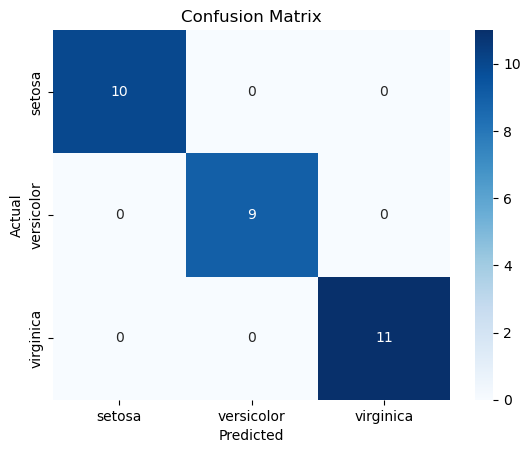

In [36]:
# Prepare data for modeling
X = iris[features]
y = iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The classification report and confusion matrix show **perfect classification** (Precision = Recall = F1-score = 1.00). But why is that?
- Iris is a well-behaved dataset with clear class separation (especially using petal features).
- Logistic Regression performs well when the data is linearly separable, which is the case here.

But what if we tried training the model with only petal_length and petal_width, would the lack of sepal features impact on the classification?

In [39]:
selected_features = ['petal_length', 'petal_width']
X_selected = iris[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Classification Report (Petal Features Only):")
print(classification_report(y_test, y_pred))


Classification Report (Petal Features Only):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Removing sepal features had zero impact, confirming that petal features alone are sufficient for classification.

### Cross-Validation for Robustness

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Mean Cross-Validation Accuracy: 0.9417


Small drop from 100%, likely due to different train-test splits, but still excellent, confirming that the model generalizes well.

## Conclusions and Future Work

### Key Insights:
- The EDA reveals that features like petal length and petal width are strong indicators for classifying the iris species.
- Statistical tests confirm significant differences between the species for key measurements.
- The logistic regression model performed well, indicating that even simple models can capture the underlying patterns in the data.

### Future Work:
- Experiment with more advanced classification models (e.g., Decision Trees, SVM, or Neural Networks).
- Explore interactive visualizations using libraries like Plotly.
- Apply similar analysis on larger or more complex datasets to further develop my data analysis and machine learning skills.

---

**Thank you for exploring my project!**


[Go back to the repository's main page](https://github.com/leonardof108/Iris-Dataset-Analysis/)